In [1]:
import os
import cv2
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#data_path = "Dataset/EyeGazeSelected/TrainingSet"
#data_path = "Dataset/EyeGaze/TrainingSet"
data_path = "Dataset/EyeDataset"

In [3]:
# categories = sorted(os.listdir(data_path))  # Ensure consistent ordering
# print("Categories:", categories)

# # Map categories to numerical labels
# label_map = {category: idx for idx, category in enumerate(categories)}
# print("Label Map:", label_map)

# images = []
# labels = []

# for category, label in label_map.items():
#     category_path = os.path.join(data_path, category)
    
#     # Load all images in the category folder
#     category_images = []
#     for file in os.listdir(category_path):
#         file_path = os.path.join(category_path, file)
#         image = cv2.imread(file_path)
#         category_images.append((image, label))
    
#     # Randomly sample 200 images for this category
#     if len(category_images) > 200:
#         category_images = random.sample(category_images, 200)
    
#     for image, label in category_images:
#         images.append(image)
#         labels.append(label)

categories = sorted(os.listdir(data_path))  # Ensure consistent ordering
print("Categories:", categories)

# Map categories to numerical labels
label_map = {category: idx for idx, category in enumerate(categories)}
print("Label Map:", label_map)

images = []
labels = []

for category, label in label_map.items():
    category_path = os.path.join(data_path, category)
    
    # Load all images in the category folder
    for file in os.listdir(category_path):
        file_path = os.path.join(category_path, file)
        image = cv2.imread(file_path)
        images.append(image)
        labels.append(label)

Categories: ['close_look', 'forward_look', 'left_look', 'right_look']
Label Map: {'close_look': 0, 'forward_look': 1, 'left_look': 2, 'right_look': 3}


In [4]:
len(images), len(labels)

(14360, 14360)

In [ ]:
#save to a csv file
df = pd.DataFrame({'images': images, 'labels': labels})
df.to_csv('Dataset/EyeGazeSelected/TrainingSet.csv', index=False)


# Image Shape

In [5]:
images[0].shape

(94, 94, 3)

In [7]:
images[1].shape

(117, 117, 3)

In [6]:
count = 0
for img in images:
    if img.shape != (480, 640, 3):
        count += 1
print(count)

14231


# Pixel Intensity Distribution

In [8]:
#count number of images that pixel intensity is 0
count = 0
for img in images:
    if np.all(img == 0):
        count += 1
print(count)

0


In [9]:
#detect the eye region
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eye_images = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
    for (ex, ey, ew, eh) in eyes:
        eye_images.append(img[ey:ey+eh, ex:ex+ew])

len(eye_images)

8992

In [10]:
#show number of the images that not detect eye
no_eye_images = []
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)
    if len(eyes) == 0:
        no_eye_images.append(img)
len(no_eye_images)


6258

In [11]:
print(8992+6258)

15250


In [12]:
def show_images(data, num_images):
        num_images = max(1, num_images)  # Ensure at least 1 image is displayed
        num_rows = (num_images + 4) // 5  # Calculate the number of rows with max 5 images per row
        num_cols = min(num_images, 5)  # Ensure at most 5 images per row

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust height based on rows

        # Handle the case where only one image is shown
        if num_images == 1:
            axes = [axes]  # Convert a single Axes object to a list for uniform indexing
        else:
            axes = axes.flatten()  # Flatten the axes array for easy indexing

        # Display images in the plot
        for i in range(num_images):
            ax = axes[i]
            ax.imshow(cv2.cvtColor(data[i], cv2.COLOR_BGR2RGB))
            ax.axis('off')

        # Remove any unused subplots
        for i in range(num_images, len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

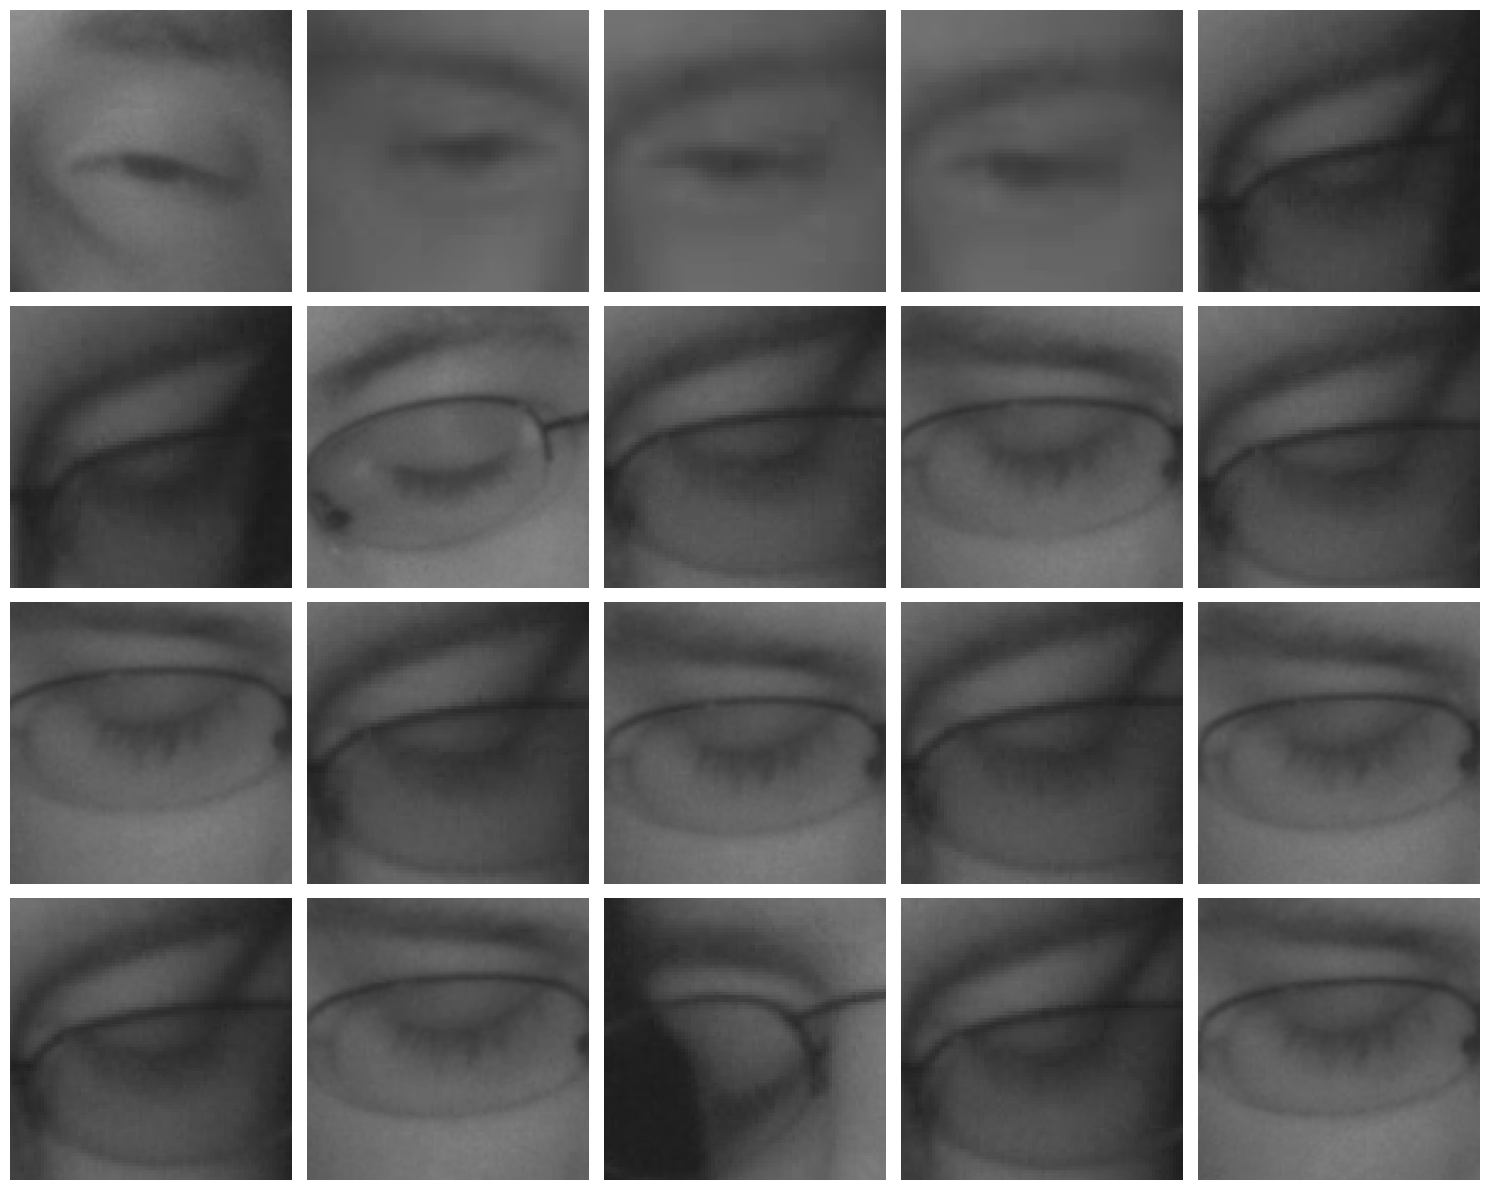

In [13]:
#show 10 of the images that not detect eye
show_images(no_eye_images, 20)


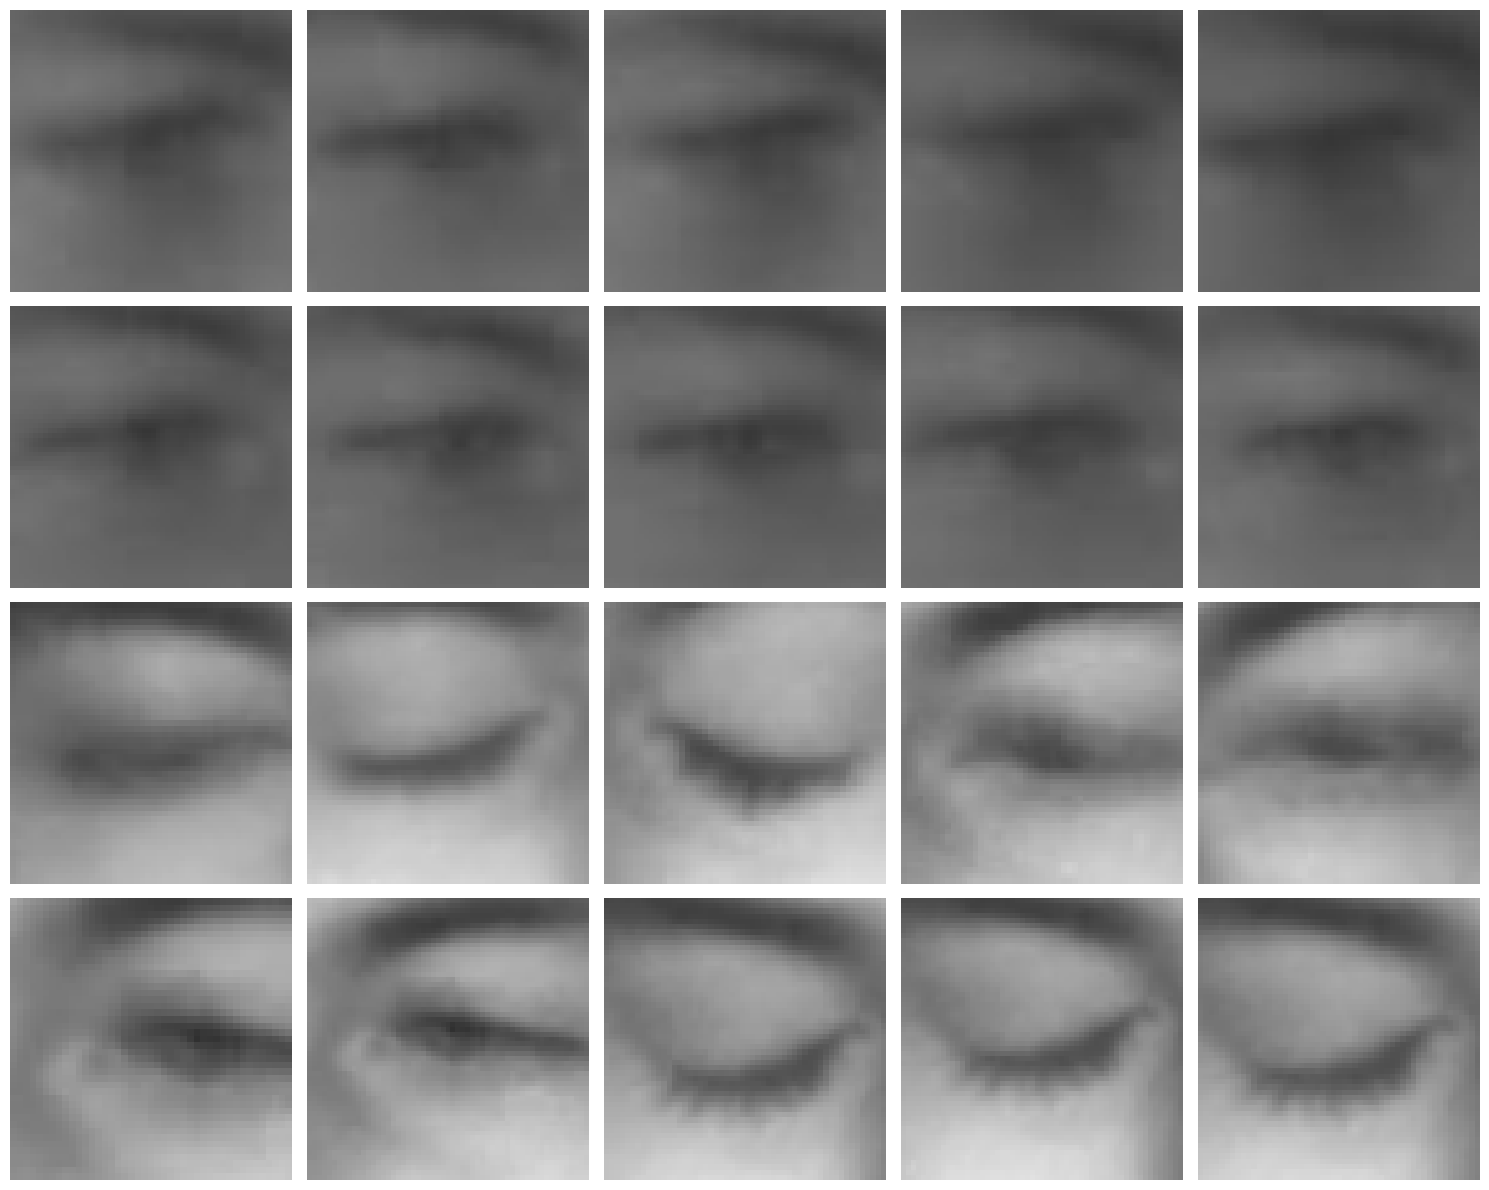

In [14]:

show_images(eye_images, 20)